In [1]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold
import scipy.stats as stat
import pylab
import xgboost as xgb
from sklearn.preprocessing import PolynomialFeatures

In [2]:
X = pd.read_csv("Train_Xcentral.csv",usecols=['temp','sal','mld','chla','dic','no3'])
y = pd.read_csv("Train_ycentral.csv",usecols=['misfit'])
X_test = pd.read_csv("Test_Xcentral.csv",usecols=['temp','sal','mld','chla','dic','no3'])
y_test = pd.read_csv("Test_ycentral.csv",usecols=['misfit'])

X['chla'] =np.log(X['chla'])
X['no3'] =np.log(X['no3'])
X['mld'] =np.log(X['mld'])

X_test['mld'] =np.log(X_test['mld'])
X_test['no3'] =np.log(X_test['no3'])
X_test['chla'] =np.log(X_test['chla'])

In [40]:
# sc = StandardScaler()
# X = sc.fit_transform(X)
# X_test = sc.transform(X_test)

In [3]:
X,X_test

(            temp        sal       mld      chla          dic       no3
 0      28.195967  35.023986  3.219611 -2.633959  1983.280609 -5.381589
 1      27.710588  35.314654  1.081084 -0.391646  2008.783447 -5.087634
 2      23.872021  34.689547  4.350107 -1.419714  1987.415202 -1.846962
 3      29.676954  35.418215  1.176273 -1.278296  1994.223267 -6.516623
 4      25.575720  35.172549  4.043007 -0.514608  1992.270630 -1.223582
 ...          ...        ...       ...       ...          ...       ...
 33641  30.245832  35.263936  3.463103 -2.860362  1996.603027 -4.949209
 33642  23.231252  35.010183  4.010721 -2.243392  2012.698771 -3.739139
 33643  28.192105  35.056268  3.285491 -2.522767  1984.562714 -5.241084
 33644  26.842026  35.443216  1.801802 -0.184411  1982.374715 -3.459343
 33645  21.281623  35.099589  2.899844  0.684640  2026.974080  1.301407
 
 [33646 rows x 6 columns],
            temp        sal       mld      chla          dic       no3
 0     26.320180  35.251114  3.82105

In [4]:
kfold = KFold(n_splits=10)

In [14]:
params={'lambda': 0.8461783235969234,
 'alpha': 0.2885737219917275,
 'subsample': 0.8760444811532235,
 'colsample_bytree': 0.688920101686858,
 'max_depth': 13,
 'min_child_weight': 18,
 'learning_rate': 0.169797582113823,
 'gamma': 0.9557621380323593,
 'n_estimators': 50,'random_state':0}

In [15]:
for train_ix, val_ix in kfold.split(X):
    X_train, X_val = X.iloc[train_ix], X.iloc[val_ix]
    y_train, y_val = y.iloc[train_ix], y.iloc[val_ix]
    # model = xgb.XGBRegressor()
    model = xgb.XGBRegressor(**params)
    model.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_val,y_val)])

[0]	validation_0-rmse:23.40244	validation_1-rmse:23.12363
[1]	validation_0-rmse:19.80855	validation_1-rmse:19.54150
[2]	validation_0-rmse:16.85411	validation_1-rmse:16.58672
[3]	validation_0-rmse:14.42242	validation_1-rmse:14.15604
[4]	validation_0-rmse:12.52328	validation_1-rmse:12.22171
[5]	validation_0-rmse:11.00458	validation_1-rmse:10.65616
[6]	validation_0-rmse:9.76370	validation_1-rmse:9.38510
[7]	validation_0-rmse:8.70943	validation_1-rmse:8.27289
[8]	validation_0-rmse:7.91757	validation_1-rmse:7.42078
[9]	validation_0-rmse:7.25433	validation_1-rmse:6.73521
[10]	validation_0-rmse:6.81039	validation_1-rmse:6.25731
[11]	validation_0-rmse:6.43224	validation_1-rmse:5.83660
[12]	validation_0-rmse:6.17690	validation_1-rmse:5.52956
[13]	validation_0-rmse:5.95251	validation_1-rmse:5.25921
[14]	validation_0-rmse:5.78478	validation_1-rmse:5.07047
[15]	validation_0-rmse:5.60131	validation_1-rmse:4.85336
[16]	validation_0-rmse:5.46774	validation_1-rmse:4.68882
[17]	validation_0-rmse:5.3857

In [17]:
y_pred = model.predict(X_test)
r21 = r2_score(y_test,y_pred)
print(r21)
rmse = mean_squared_error(y_test,y_pred,squared=False)
print(rmse)

0.9731347560882568
4.566460505970877


/home/kunal/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [18]:
y_pred_train = model.predict(X_train)
r2_tr = r2_score(y_train,y_pred_train)
print(r2_tr)
rmse_tr = mean_squared_error(y_train,y_pred_train,squared=False)
print(rmse_tr)

0.9736387729644775
4.496558411340076


/home/kunal/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Text(0.5, 1.0, 'XGBoost')

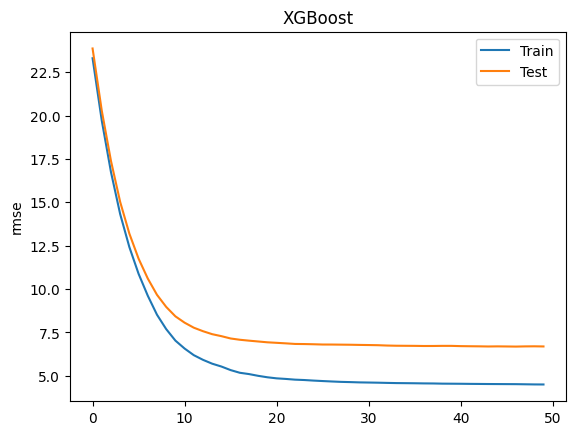

In [19]:
results = model.evals_result()
fig, ax = plt.subplots()
ax.plot( results['validation_0']['rmse'], label='Train')
ax.plot( results['validation_1']['rmse'], label='Test')
ax.legend()
plt.ylabel('rmse')
plt.title('XGBoost')

In [52]:
results

{'validation_0': OrderedDict([('rmse',
               [18.326547889550106,
                15.400445039320346,
                13.06078380742341,
                11.13594181829118,
                9.628992989088133,
                8.441244222376865,
                7.518703598356972,
                6.71982774823384,
                6.161344454121265,
                5.691913903863148,
                5.36384751705555,
                5.112237936575842,
                4.91601506842936,
                4.7735427277027656,
                4.667002373328543,
                4.529174394948205,
                4.428909472074057,
                4.377403989339648,
                4.2937552629306115,
                4.232761194174044,
                4.17726522251899,
                4.150128583688307,
                4.109258084543366,
                4.09125879401122,
                4.0579899939097075,
                4.02865918183513,
                4.005253481640819,
                3

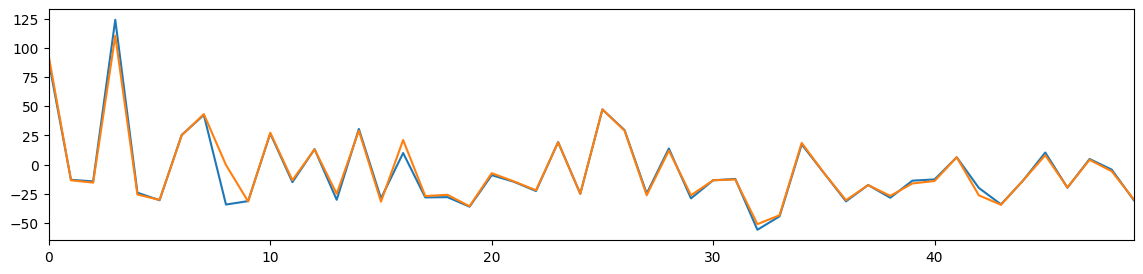

In [20]:
fig,ax=plt.subplots(figsize=(14,3))
ax=ax.margins(x=0)
plt.plot(y_test[0:50])
plt.plot(y_pred[0:50])

In [21]:
from joblib import dump
dump(model,"xgb_SD_central.joblib.dat")

['xgb_SD_central.joblib.dat']